In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("news_train.csv")

In [5]:
df.sample(6)

,ID,News_title,News_headline,Category
6717,6718,Ten standout quotes from the #Modi1 speech in ...,"Won't stop, won't bend, says PM on NDA governm...",politics
1182,1183,Rajasthan panchayat ordinance is unjust and un...,By setting arbitrary standards the government ...,politics
10196,10197,Everyone's happy about Yogi Adityanath as UP C...,BJP won 325 seats without putting up a single ...,politics
13301,13302,The anti-national’s guide to Indian nationalists,Try to emulate Arnab Goswami because if you do...,humour
1042,1043,How Karni Sena harassed Team Padmavati to hono...,Sanjay Leela Bhansali's squad left the discuss...,politics
3282,3283,Why Pakistan is waiting and watching India: Pa...,Pakistan extending a general closure notice fo...,politics


In [231]:
df.shape

(15500, 9)

In [7]:
df['Category'].value_counts()

Category
politics    11519
humour        941
sports        898
Arts          841
tech          728
business      649
Name: count, dtype: int64

In [9]:
df.isnull().sum()

ID                0
News_title        0
News_headline    76
Category          0
dtype: int64

In [11]:
df.duplicated().sum()

0

In [13]:
df.dropna(inplace=True)

In [15]:
df.isnull().sum()

ID               0
News_title       0
News_headline    0
Category         0
dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [19]:
le=LabelEncoder()

In [21]:
df['Category']=le.fit_transform(df['Category'])

In [23]:
le.classes_

array(['Arts', 'business', 'humour', 'politics', 'sports', 'tech'],
      dtype=object)

In [25]:
df.head()

,ID,News_title,News_headline,Category
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3


In [27]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
df['words_News_title']=df['News_title'].apply(lambda x: len(nltk.word_tokenize(x)))
df['words_News_headline']=df['News_headline'].apply(lambda x: len(nltk.word_tokenize(x)))

<Axes: xlabel='Category'>

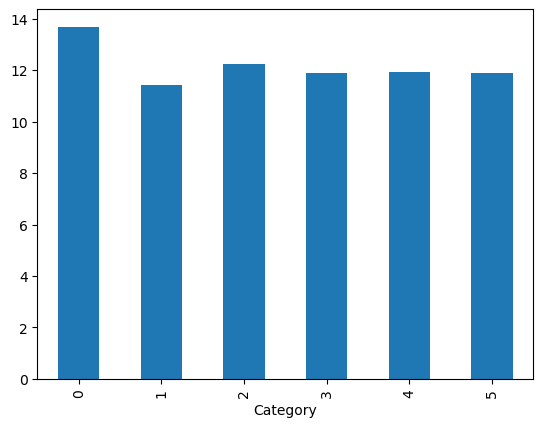

In [30]:
grouped_data1 = df.groupby('Category')['words_News_title'].mean()
grouped_data1.plot(kind='bar')


<Axes: xlabel='Category'>

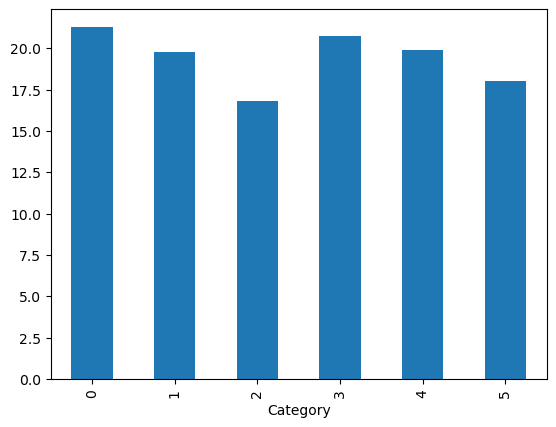

In [33]:
grouped_data2 = df.groupby('Category')['words_News_headline'].mean()
grouped_data2.plot(kind='bar')

In [35]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [37]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [39]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


In [43]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(ps.stem(i))
    return ' '.join(y)
    
             



In [45]:
transform_text('[Book Extract] From Anushasana Parva, translated by Arshia Sattar.')

'book extract anushasana parva translat arshia sattar'

In [47]:
df['News_headline'][1000]

'Not much is known about her political acumen, except that she is a key member of the Gandhi family council.'

In [49]:
df['transformed_news_title']=df['News_title'].apply(transform_text)

In [51]:
df['transformed_news_headline']=df['News_headline'].apply(transform_text)

In [53]:
df.head()

,ID,News_title,News_headline,Category,words_News_title,words_News_headline,transformed_news_title,transformed_news_headline
0,1,"Do men enjoy sex more, or women? The Mahabhara...","[Book Extract] From Anushasana Parva, translat...",0,12,13,men enjoy sex women mahabharata answer,book extract anushasana parva translat arshia ...
1,2,Why you should eat the Demonetisation laddoo,One laddoo equals to one lakh in your Jan Dhan...,2,7,15,eat demonetis laddoo,one laddoo equal one lakh jan dhan account nex...
2,3,Is the world headed for a new Cold War?,The battle lines have become very clear with R...,3,10,22,world head new cold war,battl line becom clear russia iran support bas...
3,4,"Demonetisation is all about Modi, either you'r...",How many times should this hypocritical drama ...,1,14,17,demonetis modi either 're india,mani time hypocrit drama play bother learn
4,5,Why electoral bonds won't clean up political f...,Union finance minister Arun Jaitley needs to p...,3,9,22,elector bond wo n't clean polit fund,union financ minist arun jaitley need pay heed...


In [55]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidv=TfidfVectorizer()

In [235]:
df['transformed_news_headline'].shape

(15500,)

In [57]:
X_news_headline=tfidv.fit_transform(df['transformed_news_headline']).toarray()
X_news_title=tfidv.fit_transform(df['transformed_news_title']).toarray()

In [59]:
X=np.hstack((X_news_headline,X_news_title))

In [61]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [223]:
y=df['Category'].values

In [229]:
y

array([0, 2, 3, ..., 3, 3, 3])

In [67]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,f1_score

In [73]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [75]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

0.7932258064516129
[[  52    0    2  119    0    2]
 [   0   13    0  109    0    3]
 [   6    0   26  133    6    0]
 [  18   11   15 2260    6    3]
 [   0    0    6  110   56    0]
 [   0    3    2   87    0   52]]
0.750061854878351


In [77]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(f1_score(y_test,y_pred2,average='weighted'))

0.7858064516129032
[[  19    0    1  154    1    0]
 [   0    1    0  124    0    0]
 [   1    0   12  155    3    0]
 [   0    0    2 2311    0    0]
 [   0    0    0  118   54    0]
 [   0    0    0  104    1   39]]
0.7177672662616101


In [79]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(f1_score(y_test,y_pred3,average='weighted'))

0.7680645161290323
[[  14    0    2  159    0    0]
 [   0    2    0  123    0    0]
 [   0    0    5  165    1    0]
 [   1    1    0 2311    0    0]
 [   0    0    0  135   37    0]
 [   0    0    0  132    0   12]]
0.6854248557758518


In [81]:
X_news_headline=cv.fit_transform(df['transformed_news_headline']).toarray()
X_news_title=cv.fit_transform(df['transformed_news_title']).toarray()

In [83]:
X=np.hstack((X_news_headline,X_news_title))

In [129]:
type(y)

numpy.ndarray

In [87]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [89]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [91]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [93]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(f1_score(y_test,y_pred,average='weighted'))

0.7964516129032259
[[  57    0    5  110    1    2]
 [   0   10    0  112    0    3]
 [   7    0   26  130    8    0]
 [  17   10   19 2258    5    4]
 [   0    0    5  107   60    0]
 [   0    3    2   81    0   58]]
0.7550389264353387


In [95]:
#best fit
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(f1_score(y_test,y_pred2,average='weighted'))

0.8606451612903225
[[ 105    0    7   60    2    1]
 [   0   39    0   80    0    6]
 [  11    2   37  103   16    2]
 [  14   17   21 2246    8    7]
 [   1    1    0   21  149    0]
 [   1    3    1   45    2   92]]
0.8424491619884762


In [97]:
bnb.fit(X_train,y_train)
y_pred2=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(f1_score(y_test,y_pred2,average='weighted'))

0.7680645161290323
[[  14    0    2  159    0    0]
 [   0    2    0  123    0    0]
 [   0    0    5  165    1    0]
 [   1    1    0 2311    0    0]
 [   0    0    0  135   37    0]
 [   0    0    0  132    0   12]]
0.6854248557758518


In [99]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB



In [101]:
le=LogisticRegression()
dc=DecisionTreeClassifier()
rf=RandomForestClassifier()
mnb=MultinomialNB()

In [103]:
le.fit(X_train,y_train)
y_pred=le.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.850123238584561

In [105]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.8424491619884762

In [413]:
cv=CountVectorizer(max_features=11000)

In [415]:
df['combined_text'] = df['transformed_news_headline'] + " " + df['transformed_news_title']

In [385]:
df['combined_text'].shape

(15500,)

In [417]:
X_combined_text=cv.fit_transform(df['combined_text']).toarray()


In [354]:
X_combined_text.shape

(15500, 10000)

In [357]:
y.shape

(15500,)

In [419]:
X_train,X_test,y_train,y_test=train_test_split(X_combined_text,y,test_size=0.2,random_state=2)

In [361]:
print(X_test.shape,y_test.shape)

(3100, 10000) (3100,)


In [377]:
mnb=MultinomialNB()

In [365]:
X_train.shape

(12400, 10000)

In [421]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.8633943290686451

In [345]:
print(y_pred.shape,y_test.shape)

(3100,) (3100,)


In [423]:
le.fit(X_train,y_train)
y_pred=le.predict(X_test)
f1_score(y_test,y_pred,average='weighted')

0.8519545520550801

In [66]:
#svc.fit(X_train,y_train)


In [425]:
test_df=pd.read_csv('test.csv')

In [427]:

print(test_df.shape)

(3484, 3)


In [429]:
test_df.isnull().sum()

ID                0
News_title        0
News_headline    16
dtype: int64

In [431]:

test_df['News_headline'].fillna(test_df['News_title'], inplace=True)

C:\Users\mahan\AppData\Local\Temp\ipykernel_8584\2022764577.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['News_headline'].fillna(test_df['News_title'], inplace=True)


In [433]:
len(test_df['News_headline'])

3484

In [435]:

test_df['transformed_news_title']=test_df['News_title'].apply(transform_text)


In [437]:
test_df['transformed_news_headline']=test_df['News_headline'].apply(transform_text)

In [439]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3484 entries, 0 to 3483
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   ID                         3484 non-null   int64 
 1   News_title                 3484 non-null   object
 2   News_headline              3484 non-null   object
 3   transformed_news_title     3484 non-null   object
 4   transformed_news_headline  3484 non-null   object
dtypes: int64(1), object(4)
memory usage: 136.2+ KB


In [441]:
test_df.shape

(3484, 5)

In [443]:
test_df['combined_text'] = test_df['transformed_news_headline'] + " " + test_df['transformed_news_title']

In [459]:
test_df['combined_text'].shape

(3484,)

In [447]:
X_test_combined_text=cv.transform(test_df['combined_text']).toarray()

In [455]:
y_test_pred=mnb.predict(X_test_combined_text)

In [555]:
submission = pd.DataFrame({
    'ID': test_df['ID'],
    'Category': y_test_pred
})

In [557]:
print(submission)

        ID  Category
0        1         3
1        2         3
2        3         3
3        4         4
4        5         3
...    ...       ...
3479  3480         3
3480  3481         3
3481  3482         3
3482  3483         3
3483  3484         3

[3484 rows x 2 columns]


In [559]:
submission.to_excel('submission.xlsm', index=False)

In [553]:
print(submission.shape)


(3484, 2)


In [ ]:
ID=test_df['ID'].

In [ ]:
da = {'ID': test_df['ID'],
        'Category': y_test_pred}
df = pd.DataFrame(data)